# Import Data File

In [62]:
import pandas as pd
df = pd.read_csv("multipleChoiceResponses.csv", low_memory = False)

# display first 5 rows of the dataset
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


# See Data Features For Each Columns

In [63]:
df.describe()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
count,23860,23860,23860,23860,23860,23439,22948,22901,23860,21686,...,23860,1372,6479,2675,2105,3570,1060,2501,521,23860
unique,6523,5,68,13,59,8,14,22,864,20,...,170,2,2,2,2,2,2,2,2,410
top,101,Male,-1,25-29,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Student,-1,Computers/Technology,...,-1,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,None of these reasons apply to me,Other,-1
freq,31,19430,23780,6159,4716,10855,9430,5253,22537,5584,...,23689,1371,6478,2674,2104,3569,1059,2500,520,23428


# Remove Unwanted Entries From Target Variable Columns

Here we see that there are total entries in target column with number of unique entries & remove unwanted text row. 

In [64]:
df.dropna(subset=['Q9'],inplace=True) 
df = df[df['Q9']!= "I do not wish to disclose my approximate yearly compensation"]
df['Q9'].describe()

count        15430
unique          19
top       0-10,000
freq          4398
Name: Q9, dtype: object

# Data Cleaning

Here we are removing columns which don't have direct impact on our target variable i.e. Salary Compensation.

Firstly we remove all the columns titled 'Other Text' which have values '-1'. This columns don't provide much info. about target variable. 

Then we remove other columns like software, notebooks, cloud platforms etc. used by audience in last 5 years which has little impact on salary. 

In [65]:
#collect column titles 
df_col = df.columns

#Collect all columns with title 'Other-Text'
result = [i for i in df_col if i.endswith('_TEXT')]

#Collect all columns with skills like cloud-platform, software & notebooks

questions = [i for i in df_col if i.startswith('Q33_Part') or i.startswith('Q36_Part') or i.startswith('Q38_Part')
             or i.startswith('Q13_Part') or i.startswith('Q14_Part') or i.startswith('Q15_Part') or i.startswith('Q16_Part')
            or i.startswith('Q19_Part') or i.startswith('Q21_Part') or i.startswith('Q27_Part') or i.startswith('Q28_Part')
            or i.startswith('Q29_Part') or i.startswith('Q30_Part') or i.startswith('Q31_Part') or i.startswith('Q39_Part') 
             or i.startswith('Q4') or i.startswith('Q5')] 

result.append('Time from Start to Finish (seconds)')
result.append('Q11_Part_7')

#Remove repeated entries from secod list
questions.remove('Q49_OTHER_TEXT')
questions.remove('Q42_OTHER_TEXT')
questions.remove('Q50_OTHER_TEXT')

salary = df

#remove the collected columns 
for j in result:
    salary = salary.drop(columns=[j])
for k in questions:
    salary = salary.drop(columns=[k])

#see the retained columns in dataframe    
salary.columns

Index(['Q1', 'Q2', 'Q3', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11_Part_1',
       'Q11_Part_2', 'Q11_Part_3', 'Q11_Part_4', 'Q11_Part_5', 'Q11_Part_6',
       'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q20', 'Q22', 'Q23', 'Q24', 'Q25',
       'Q26', 'Q32', 'Q32_OTHER', 'Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3',
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q35_Part_1', 'Q35_Part_2',
       'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5', 'Q35_Part_6', 'Q37'],
      dtype='object')

Here we are removing question title as it would cause error while performing furthur calculations 

In [66]:
salary = salary.drop([0],axis=0)

Now we will fill empty rows in columns with numerical data. For this we are using Simple Imputer to impute the mean of data in column & fill the empty rows with mean.   

In [67]:
from sklearn.impute import SimpleImputer
import numpy as np

#Intialize Simple Imputer 
imp = SimpleImputer(
    missing_values=np.nan,
    strategy='mean',
    verbose=1
)

#Collect column titles with numerical data
df_col = salary.columns
result = [i for i in df_col if i.startswith('Q34_Part') or i.startswith('Q35_Part')]

#Apply Simple Imputer on collected columns
for j in result:
    imp.fit(
    salary[j].values.reshape((-1,1))
    )
    salary[j] = imp.transform(salary[j].values.reshape((-1,1)))

#See imputed data in single column
print(salary[j].head())    

2    2.03879
3    0.00000
5    0.00000
7    0.00000
8    0.00000
Name: Q35_Part_6, dtype: float64


In [33]:
# nll = [] 
# cols = []
# for col in salary.columns:
#     cols.append(col)
#     a = salary[col].isnull().sum()
#     nll.append(round((a/15429)*100,2))
   
# country = salary['Q3'].unique()
# nul = [] 
# count = []
# print(salary.isnull().sum().sum())    

# for c in country:
#     df_new = salary[salary['Q3'] == c]
#     nul.append(df_new.isnull().sum().sum())
#     count.append(df_new['Q1'].count())
# #    print('country = ',c,'null = ',nul,'\n')
# print('======================') 
# c_list = pd.DataFrame(
#     {'c': country,
#      'null': nul,
#      'count': count
#     })
# q_list = pd.DataFrame(
#     {'q': cols,
#      'null': nll
#     })
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(q_list.sort_values(by=['null'])) 
# #c_list.sort_values(by=['null'])    
    

106267
                      q   null
0                    Q1   0.00
27           Q34_Part_3   0.00
26           Q34_Part_2   0.00
25           Q34_Part_1   0.00
24            Q32_OTHER   0.00
36           Q35_Part_6   0.00
28           Q34_Part_4   0.00
30           Q34_Part_6   0.00
31           Q35_Part_1   0.00
32           Q35_Part_2   0.00
29           Q34_Part_5   0.00
34           Q35_Part_4   0.00
35           Q35_Part_5   0.00
6                    Q9   0.00
1                    Q2   0.00
2                    Q3   0.00
3                    Q6   0.00
4                    Q7   0.00
33           Q35_Part_3   0.00
5                    Q8   0.49
7                   Q10   1.89
14  Q12_MULTIPLE_CHOICE  10.19
16                  Q18  11.81
19                  Q23  12.76
20                  Q24  12.88
21                  Q25  13.05
22                  Q26  13.11
15                  Q17  28.14
23                  Q32  33.22
17                  Q20  37.39
18                  Q22  40.46
8

Now to furthur compress the data we will set threshold of 10% & remove all the columns with data percentage less than 10%

In [70]:
#set threshold as 10% data i.e. 90% empty rows
salary.dropna(thresh=int(salary.shape[0] * .1), axis=1,inplace = True)

#print all the remaining columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(salary.columns)

Index(['Q1', 'Q2', 'Q3', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11_Part_1',
       'Q11_Part_2', 'Q11_Part_3', 'Q11_Part_4', 'Q11_Part_5', 'Q11_Part_6',
       'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q20', 'Q22', 'Q23', 'Q24', 'Q25',
       'Q26', 'Q32', 'Q32_OTHER', 'Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3',
       'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q35_Part_1', 'Q35_Part_2',
       'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5', 'Q35_Part_6', 'Q37'],
      dtype='object')


Now we will use heatplot of null entries in columns to see if there are any columns remaining with considerable empty rows.

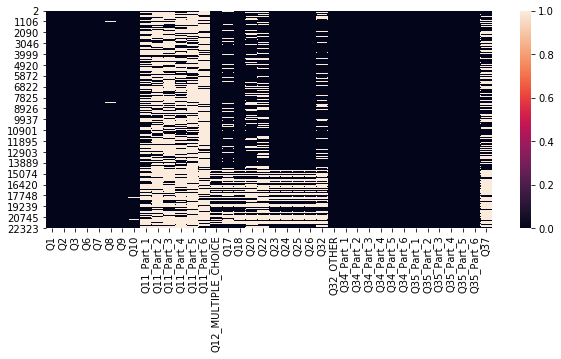

In [73]:
plt.figure(figsize=(10,4))
sns.heatmap(salary.isnull())

Finally we will replace rest of the empty rows in columns with categorical data with 'mode' of entries.

In [84]:
new_sal = salary.select_dtypes(include=['object'])
new_sal = new_sal.drop(columns=['Q9'])
cols = new_sal.columns
for colmn in cols:
    salary[colmn] = salary[colmn].fillna(salary[colmn].mode()[0])

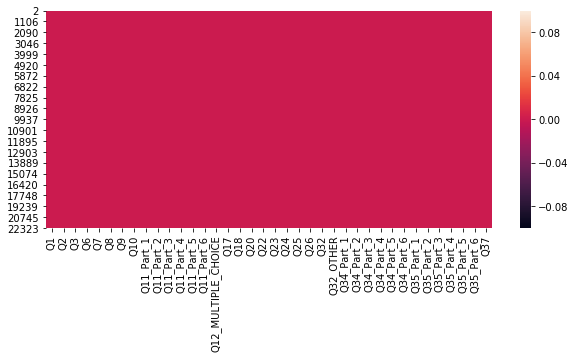

In [76]:
#Plotting heatmap again to see any empty column
plt.figure(figsize=(10,4))
sns.heatmap(salary.isnull())

# Exploratory Data Analysis

Firstly we will see the most & the least common salary bucket.

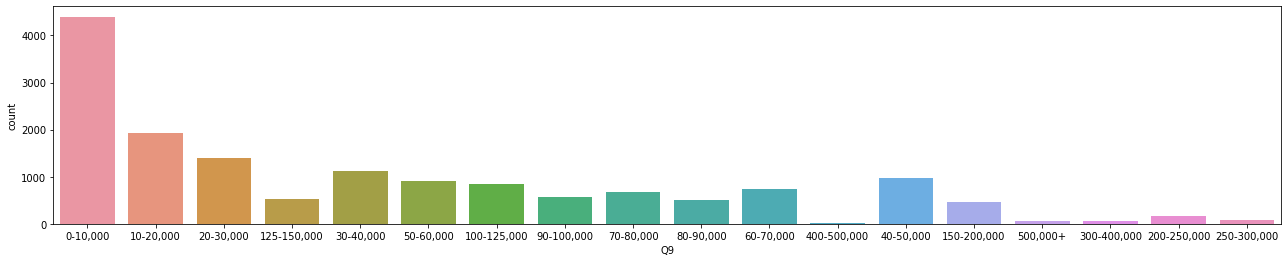

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,4))
compn = salary['Q9']
sns.countplot(x=compn[1:],data=salary)

We see that 0-10000 is the most common while 400-500000 is the least.

Now we will see if age has any impact on salary compensation. 

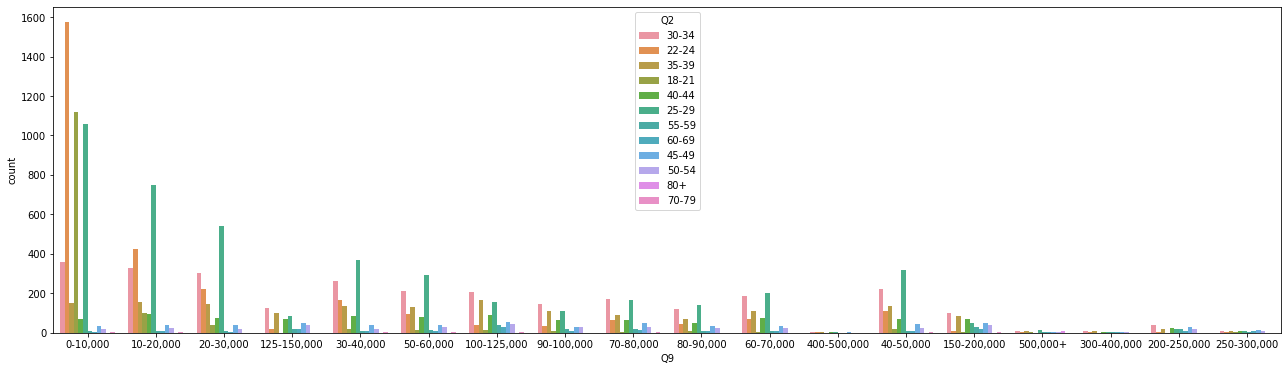

In [102]:
plt.figure(figsize=(22,6))
age = salary['Q2']
sns.countplot(x=compn[1:],hue=age,data=salary)

We see that the younge age group (22-24) has lower salary than older age group. Additionally, older age group tend to have higher salary (age group -> 55-59)

Now we will encode feature data as well as target data to convert categorical variables into numerical data

In [112]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#encode target data
salary['Q9'] = le.fit_transform(salary['Q9'])

#encode features
salary = pd.get_dummies(salary,columns=cols,drop_first=True)

In [114]:
#separate features & target
X = salary.drop(['Q9'],axis=1)
y = salary['Q9']

#make copy for furthur use
Z = X
w = y

# Feature Selection

Here we will use multiple feature selection methods to see which features are repeatedly shown to be important & finally select top important features 

Firstly, we will use the feature importance property of the model to get the feature importance of each feature of dataset. 
Feature importance outputs score the feature, thus higher the score more important or relevant is the feature.

c:\users\sai\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


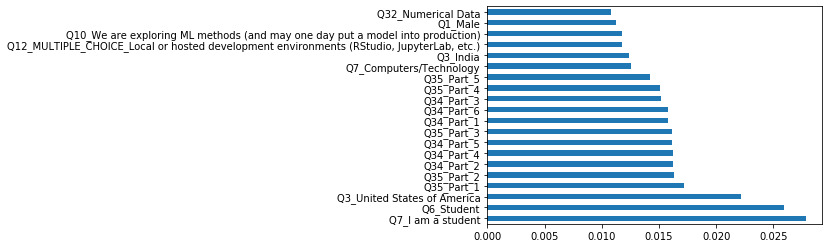

In [42]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Here we have plotted top 20 important features against their score.

Secodnly we are using wrapper methode which uses machine learning algorithm. Here we are using Recursive Feature Elimination which recursively removes attributes & builds model. Attributes are ranked based on accuracy. The RFE uses model & features as input. As the output it gives ranking of all the variables, 1 is the most important.

Best alpha using built-in LassoCV: 0.014484
Best score using built-in LassoCV: 0.324737
Lasso picked 82 variables and eliminated the other 203 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

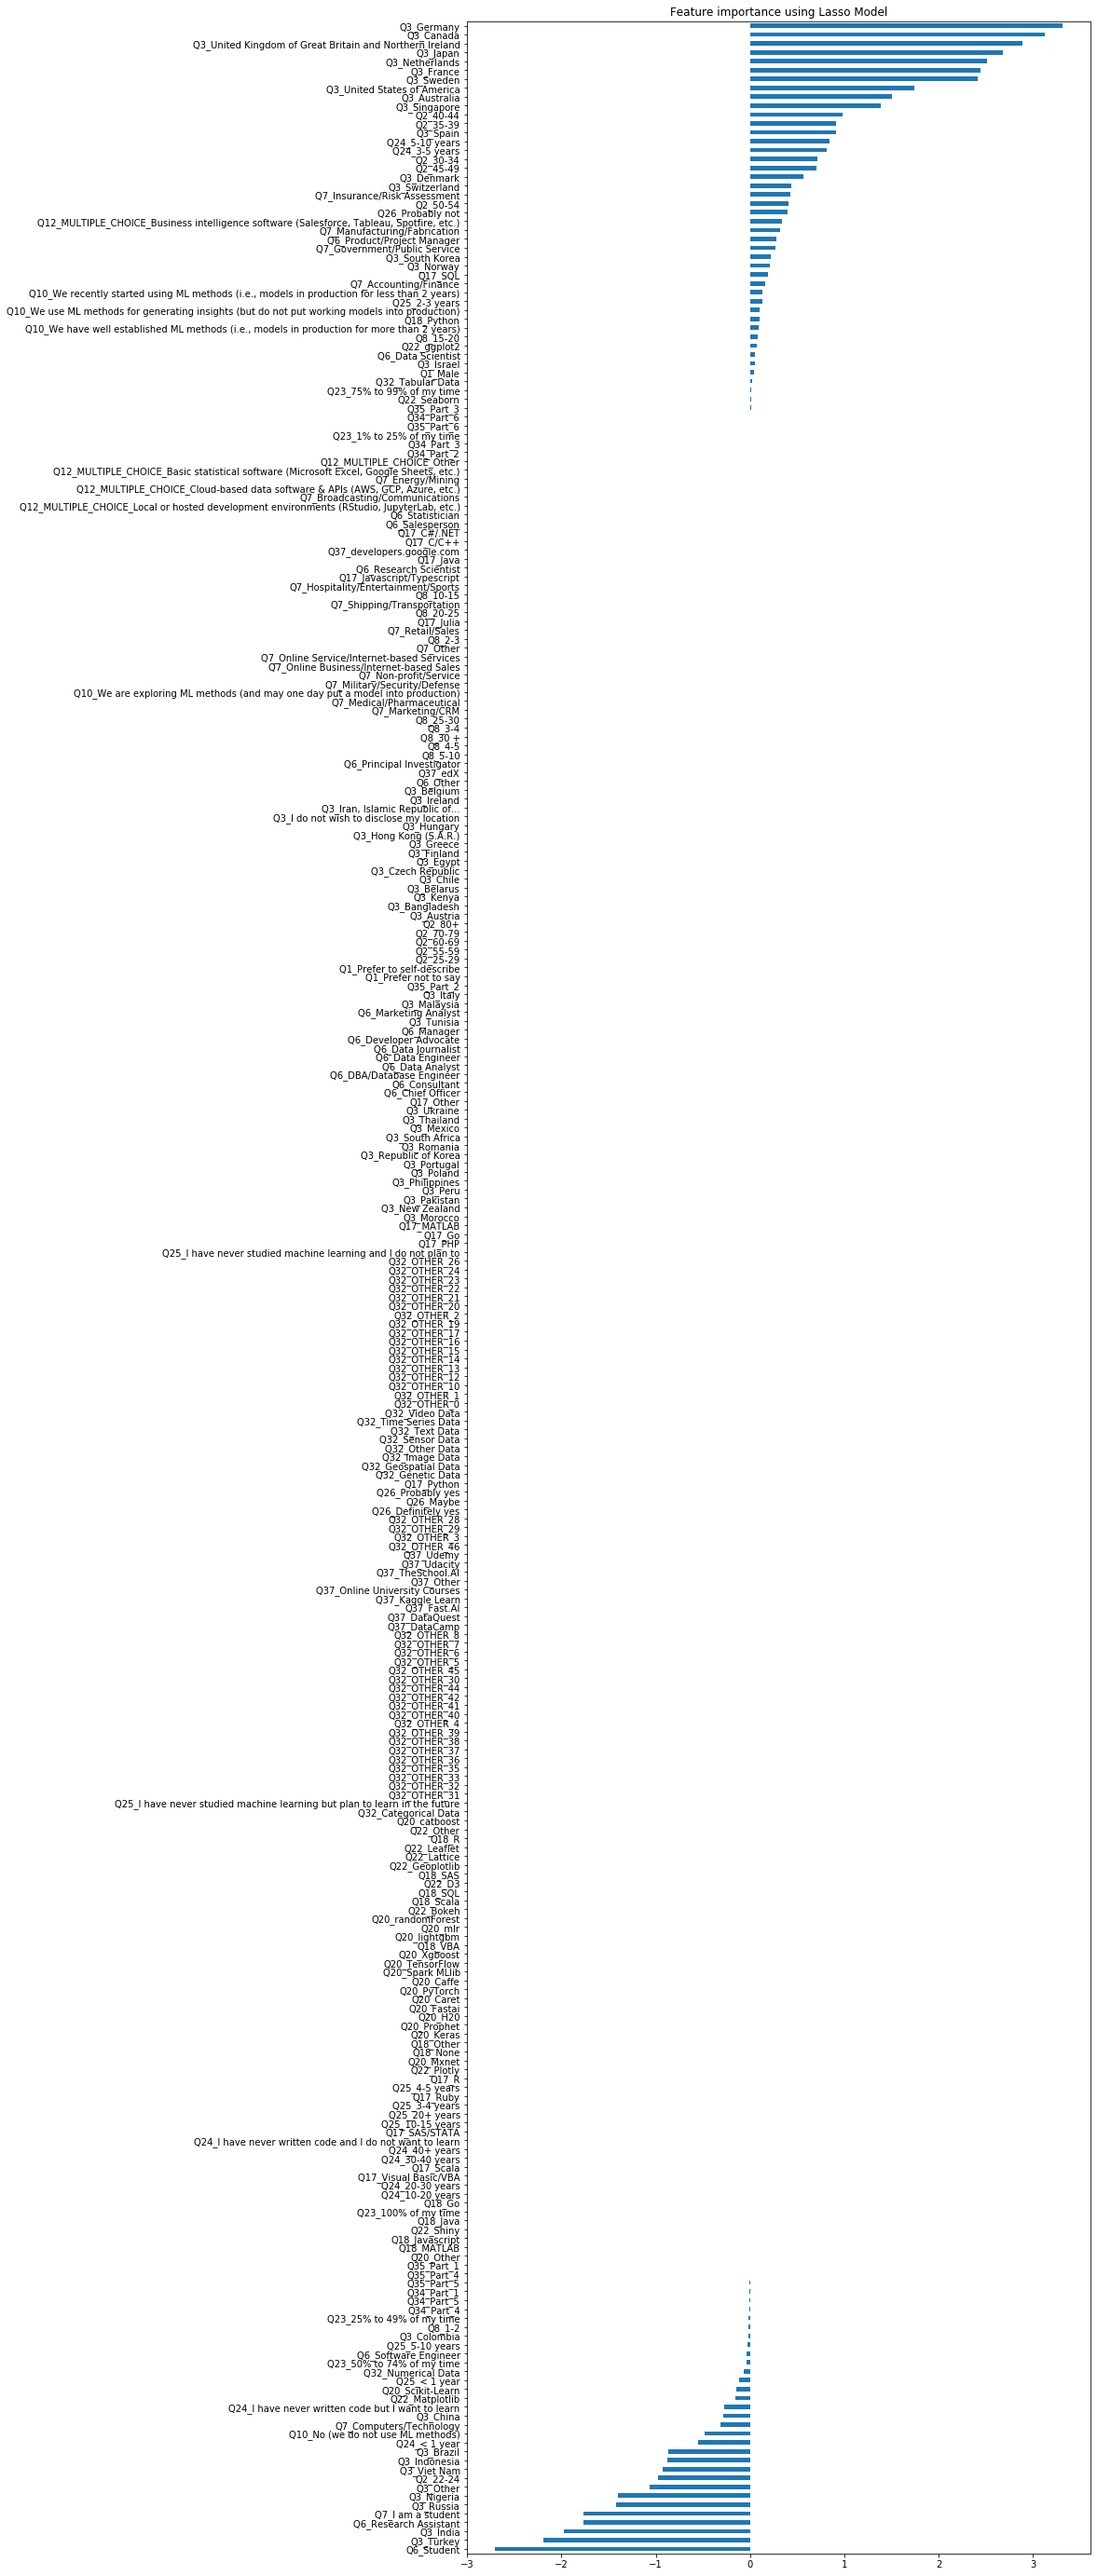

In [121]:
#Import modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Intitalize & fit model on X & y
reg = LassoCV()
reg.fit(Z, w)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(Z,w))
coef = pd.Series(reg.coef_, index = Z.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 50.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Here we took LinearRegression model and RFE gave feature ranking as shown.

Finally we use random forest classifier. The random forests ranks by how well they improve the purity of the node of tree. Thus decrease in impurity over all trees (called gini impurity). Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by cutting trees under threshold, we get subset of most important features.

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#select feature & target data
X = salary.drop(['Q9'],axis=1)
y = salary['Q9']
X_fet = X.columns

#split data into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(X_fet, clf.feature_importances_):
    print(feature)


('Q34_Part_1', 0.022984196007993882)
('Q34_Part_2', 0.023624741124613866)
('Q34_Part_3', 0.02110179824396346)
('Q34_Part_4', 0.02263086837518091)
('Q34_Part_5', 0.02063058112334311)
('Q34_Part_6', 0.021117083212019945)
('Q35_Part_1', 0.023729915511938763)
('Q35_Part_2', 0.022445631225843133)
('Q35_Part_3', 0.022674047112733926)
('Q35_Part_4', 0.019217817408609433)
('Q35_Part_5', 0.01721636866321017)
('Q35_Part_6', 0.006688992821198309)
('Q1_Male', 0.009824531593602486)
('Q1_Prefer not to say', 0.0011323085711886789)
('Q1_Prefer to self-describe', 0.0005962120556781816)
('Q2_22-24', 0.011234687400803444)
('Q2_25-29', 0.009875896484389253)
('Q2_30-34', 0.009134978648652122)
('Q2_35-39', 0.007199547249286012)
('Q2_40-44', 0.005269160406023388)
('Q2_45-49', 0.0035604228716469327)
('Q2_50-54', 0.0027071090926389586)
('Q2_55-59', 0.0016217007159882195)
('Q2_60-69', 0.0011636138626521973)
('Q2_70-79', 0.00022199788038613827)
('Q2_80+', 0.00023058255502502828)
('Q3_Australia', 0.00215634767580

In [47]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf,threshold=0.0098)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
       

In [48]:
# Print the names of the most important features
# for feature_list_index in sfm.get_support:
#     print(X_fet[feature_list_index])

selected_feat= X.columns[(sfm.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5',
       'Q34_Part_6', 'Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4',
       'Q35_Part_5', 'Q1_Male', 'Q2_22-24', 'Q2_25-29', 'Q3_India',
       'Q3_United States of America', 'Q6_Student', 'Q7_Computers/Technology',
       'Q7_I am a student', 'Q8_1-2',
       'Q10_We are exploring ML methods (and may one day put a model into production)',
       'Q12_MULTIPLE_CHOICE_Local or hosted development environments (RStudio, JupyterLab, etc.)',
       'Q23_50% to 74% of my time'],
      dtype='object')


We select features given by random forest as final as same features have been repeated in almost all algorithms.

# Model implementation

Now we will implement model. Firstly we will keep features given by feature selection, removing all unnecessary data.

In [49]:
X_important = salary.drop(['Q9'],axis=1)
X_important = salary.filter(selected_feat)
y_important = salary['Q9']



Now we will define function to be used for plotting learning curve.

In [50]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

In [123]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Firstly, we will get accuracy of Logistic regression on whole data frame without split/k-fold

In [52]:
logreg = LogisticRegression()
predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted)) 


0.36243437682286606
              precision    recall  f1-score   support

           0       0.59      0.88      0.71      4398
           1       0.27      0.27      0.27      1937
           2       0.21      0.33      0.25       843
           3       0.17      0.14      0.15       533
           4       0.25      0.24      0.24       457
           5       0.20      0.13      0.16      1395
           6       0.14      0.05      0.07       172
           7       0.00      0.00      0.00        75
           8       0.15      0.09      0.11      1119
           9       0.00      0.00      0.00        52
          10       0.17      0.15      0.16       965
          11       0.00      0.00      0.00        23
          12       0.15      0.13      0.14       919
          13       0.24      0.11      0.15        63
          14       0.14      0.11      0.12       729
          15       0.12      0.07      0.09       677
          16       0.14      0.08      0.10       506
       

We see that accuracy was 36%

Now we will split data into train & test data. Then we will implement Logistic Regression model on train data & find the accuracy.

In [53]:
X_important_train, X_important_test, y_train, y_test = train_test_split(X_important,y_important,test_size=0.3,random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_important_train)
X_test = scaler.transform(X_important_test)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

predictions = logreg.predict(X_test)

ACC = accuracy_score(predictions,y_test)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))  

This model got an accuracy of 30.72% on the testing set


The above model was without cross-validation. Now we will do cross-validation with 10 fold.

In [54]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)
model = LogisticRegression()
scaler = StandardScaler()
kf.get_n_splits(X_important)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kf.split(X_important):
    X_train, X_test = X_important.values[train_idx], X_important.values[test_idx]
    y_train, y_test = y_important.values[train_idx], y_important.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    ACC = accuracy_score(predictions,y_test)
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(ACC),3),round(np.std(ACC),3)))


Fold 1: Accuracy: 0.328%
Fold 2: Accuracy: 0.326%
Fold 3: Accuracy: 0.317%
Fold 4: Accuracy: 0.316%
Fold 5: Accuracy: 0.292%
Fold 6: Accuracy: 0.315%
Fold 7: Accuracy: 0.334%
Fold 8: Accuracy: 0.31%
Fold 9: Accuracy: 0.312%
Fold 10: Accuracy: 0.311%
Average Score: 0.311%(0.0%)


We see that accuracy is 31% which is lesser than accuracy of whole data frame. It is expected as the feature/train-test data used for k-fold model was cut down with features selection. But lost of 5% accuracy is small price to pay as compared to amount of data that was compressed. 

Now we plot learning curve.

<module 'matplotlib.pyplot' from 'c:\\users\\sai\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

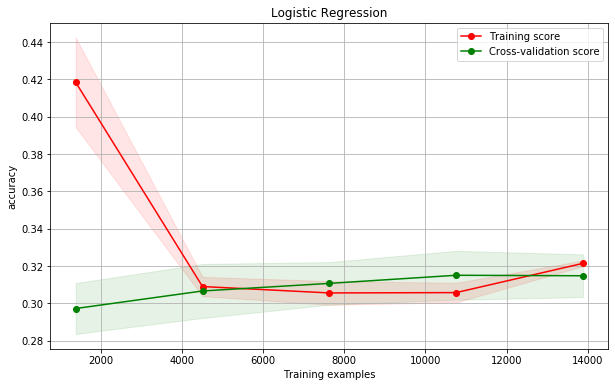

In [55]:
plot_learning_curve(model,'Logistic Regression', X_important, y_important, cv=10)

The learning curve shows that the model is neither underfit nor overfit the data.
It is evident that the training loss is gradually decreasing to a point of stability & there's minimal gap between the two final scores.

# Model tuning

The Logistic Regression model used above had random/deafualt parameter values. Thus there was no way to get what parameter will give us best accuracy
Hence, in this step we will take Grid Search to test all the permutation & combinations of model & use it on train data.
The grid search will give us best parameters acroos the board for maximum accuracy

In [126]:
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()

# Create regularization hyperparameter space
C = [0.01,0.1,1,10,100]

solver = ['newton-cg','lbfgs','liblinear','sag']

# Create hyperparameter options
hyperparameters = dict(C=C, solver=solver)

# Create grid search using 10-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

# Fit grid search
best_model = clf.fit(X_important, y_important)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1


In [127]:
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])

Best Solver: liblinear


We observed that the best hyperparameters across the board are penalty = l2, c = 1 & solver = liblinear

Now we test the above paramers on test data & see the impact on accuracy

In [128]:
model = LogisticRegression(C=1,solver='liblinear',penalty='l2')

model.fit(X_train,y_train)

predictions = logreg.predict(X_test)

ACC = accuracy_score(predictions,y_test)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))  

This model got an accuracy of 32.49% on the testing set


As expected the accuracy got improved nearly 33% from intial 31%. 

Finally we plot distribution curve for predictions.
It's observed that most of the predicted labels belong to class 0 i.e. salary bucket 0-10000 

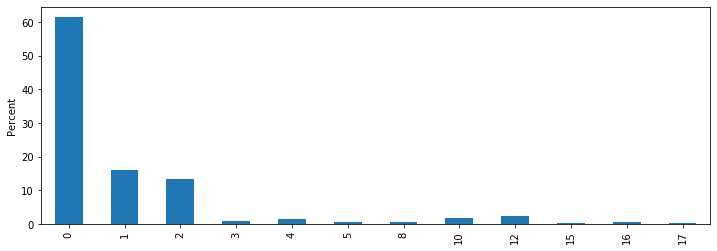

In [129]:
plt.figure(figsize=(12,4))
ax = (pd.Series(predictions).value_counts(normalize=True, sort=False)*100).plot.bar()
ax.set(ylabel="Percent")
plt.show()